In [ ]:
import numpy as np #1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.io import loadmat
from scipy import stats
import statsmodels.api as sm
plt.style.use("ggplot")        # pick any style you like
%matplotlib inline

from scipy.optimize import least_squares

In [8]:
from math import erf

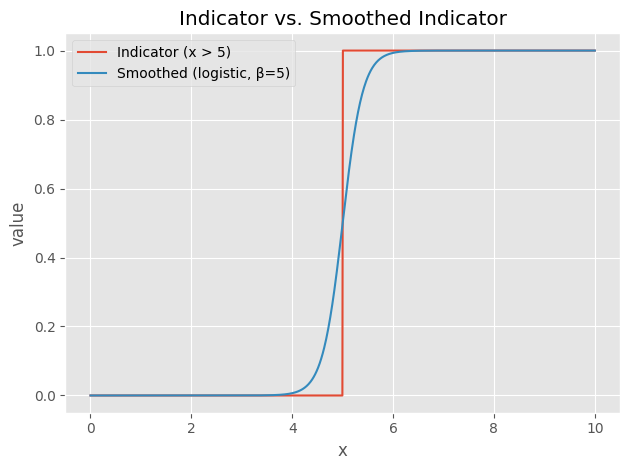

In [6]:

# Define the domain
x = np.linspace(0, 10, 1000)

# Sharp indicator 1_{x>5}
indicator = (x > 5).astype(float)

# Smoothed indicator using a logistic (sigmoid) function
beta = 5  # controls steepness; larger = sharper
smoothed = 1 / (1 + np.exp(-beta * (x - 5)))

# Plot both functions
plt.figure()
plt.plot(x, indicator, label="Indicator (x > 5)")
plt.plot(x, smoothed, label=f"Smoothed (logistic, β={beta})")
plt.xlabel("x")
plt.ylabel("value")
plt.title("Indicator vs. Smoothed Indicator")
plt.legend()
plt.tight_layout()
plt.show()

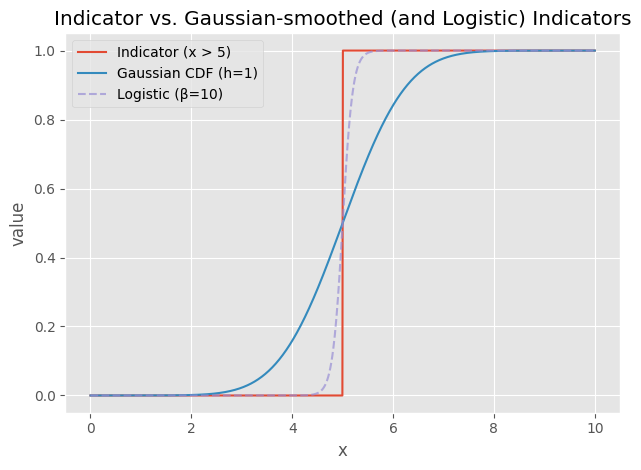

In [24]:

# Define the domain
x = np.linspace(0, 10, 1000)

# --- Gaussian‑smoothed indicator ---------------------------------
h = 1  # smoothing length
gaussian_cdf = 0.5 * (1 + np.vectorize(erf)((x - 5) / (np.sqrt(2) * h)))

# --- Logistic (sigmoid) ----------------------------
beta = 10
logistic = 1 / (1 + np.exp(-beta * (x - 5)))

# Plot
plt.figure()
plt.plot(x, indicator, label="Indicator (x > 5)")
plt.plot(x, gaussian_cdf, label=f"Gaussian CDF (h={h})")
plt.plot(x, logistic, linestyle="--", label=f"Logistic (β={beta})", alpha=0.7)
plt.xlabel("x")
plt.ylabel("value")
plt.title("Indicator vs. Gaussian‑smoothed (and Logistic) Indicators")
plt.legend()
plt.tight_layout()
plt.show()